# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read File

In [2]:
df = pd.read_csv("loan_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
# Data is clean and neat, so need for any sort of cleaning procedures.

# Exploratory Data Analysis

## 1. Purpose Analysis

In [6]:
purposes = df["purpose"].unique()
purposes

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

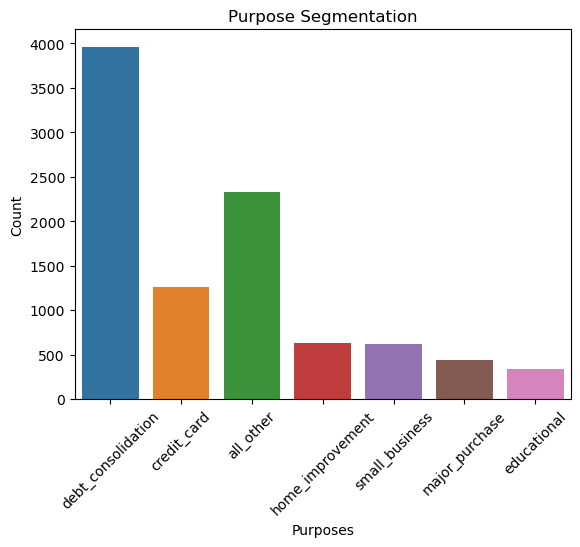

In [7]:
sns.countplot(x = "purpose", data = df)
plt.title("Purpose Segmentation")
plt.xlabel("Purposes")
plt.xticks(rotation = 45)
plt.ylabel("Count");

## 2. FICO Score (Credit Score)

##### First we need to categorize the FICO Score according to the valis and reliable international metrics & criteria

In [8]:
fico_score=[]
for i in df["fico"]:
    if  800 <= i <= 850:
        fico_score.append("Exceptional")
    elif  740 <= i <= 799:
        fico_score.append("Very Good")
    elif  670 <= i <= 739:
        fico_score.append("Good")
    elif  580 <= i <= 699:
        fico_score.append("Fair")
    elif  300 <= i <= 579:
        fico_score.append("Poor")

In [9]:
## Adding a column, having each customer assigned to his FICO score category
df["FICO_GRADE"] = fico_score

In [10]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,FICO_GRADE
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,Good
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,Good
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,Good
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,Good
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,Fair


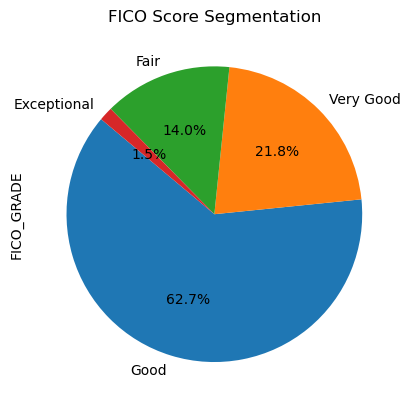

In [11]:
df["FICO_GRADE"].value_counts().plot(kind = "pie",
                                     title = "FICO Score Segmentation", 
                                     autopct='%2.1f%%', 
                                     startangle=140);

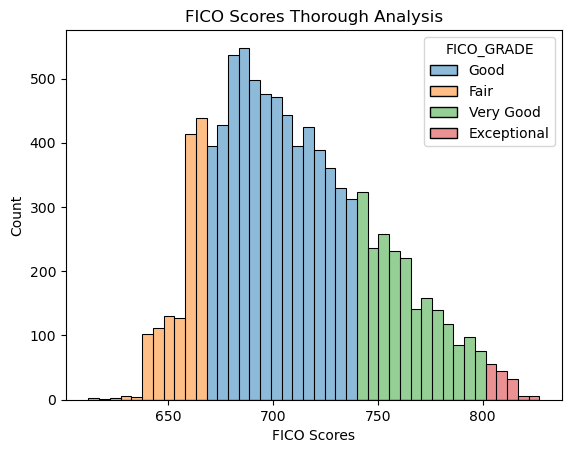

In [12]:
sns.histplot(x = "fico", hue = "FICO_GRADE", data = df)
plt.xlabel("FICO Scores")
plt.ylabel("Count")
plt.title("FICO Scores Thorough Analysis");

In [13]:
# Average FICO Score
int(df["fico"].mean())

710

In [14]:
# Max FICO Score
df["fico"].max()

827

In [15]:
# Min FICO Score
df["fico"].min()

612

## 3. Credit Utilization

#### Credit Utilization is the best indicator for FICO Score

In [16]:
cr_util=[]
for i in df["revol.util"]:
    if  0 <= i <= 10:
        cr_util.append("Excellent")
    elif  11 <= i <= 20:
        cr_util.append("Good")
    elif  21 <= i <= 30:
        cr_util.append("Fair")
    elif  31 <= i <= 50:
        cr_util.append("Poor")
    elif  51 <= i <= 100:
        cr_util.append("High")
    else:
        cr_util.append("Overutilization")

In [17]:
df["CREDIT UTIL"] = cr_util

In [18]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,FICO_GRADE,CREDIT UTIL
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,Good,High
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,Good,High
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,Good,Fair
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,Good,High
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,Fair,Poor


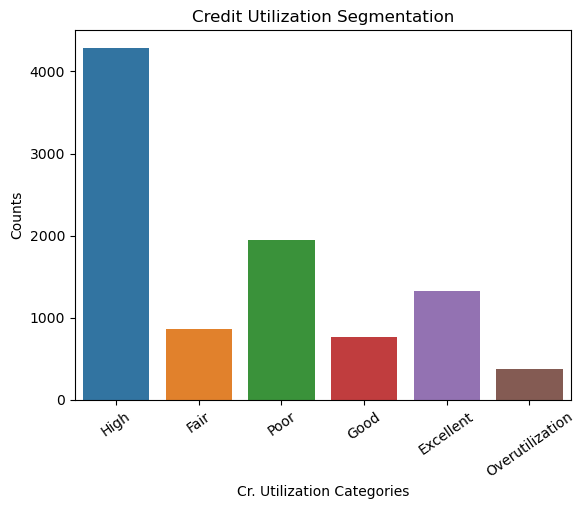

In [19]:
sns.countplot(x = df["CREDIT UTIL"],data = df)
plt.title("Credit Utilization Segmentation")
plt.xlabel("Cr. Utilization Categories")
plt.xticks(rotation = 35)
plt.ylabel("Counts");

## 4. DTI

In [20]:
# Creating a new column for DTI results
dti_x=[]
for i in df["dti"]:
    if  0 <= i <= 15:
        dti_x.append("Low DTI")
    elif  16 <= i <= 25:
        dti_x.append("Moderate DTI")
    elif  26 <= i <= 36:
        dti_x.append("Borderline DTI")
    elif  37 <= i <= 49:
        dti_x.append("High DTI")
    else:
        dti_x.append("Severely High DTI")

In [21]:
df["DTI RESULTS"] = dti_x

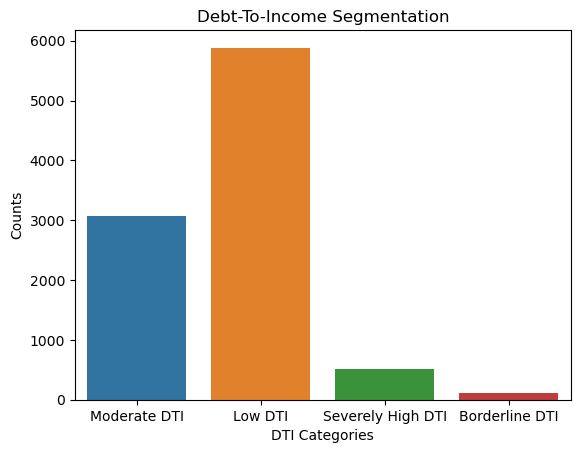

In [22]:
sns.countplot(x = df["DTI RESULTS"] , data = df)
plt.title("Debt-To-Income Segmentation")
plt.xlabel("DTI Categories")
plt.ylabel("Counts");

## 5. Paid & Not Fully Paid Debts

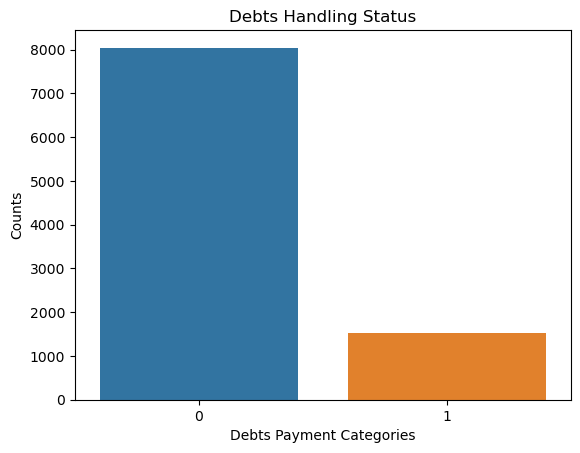

In [23]:
sns.countplot(x = df['not.fully.paid'], data = df)
plt.title("Debts Handling Status")
plt.xlabel("Debts Payment Categories")
plt.ylabel("Counts");

## 6. Delinquincies in the last 2 years

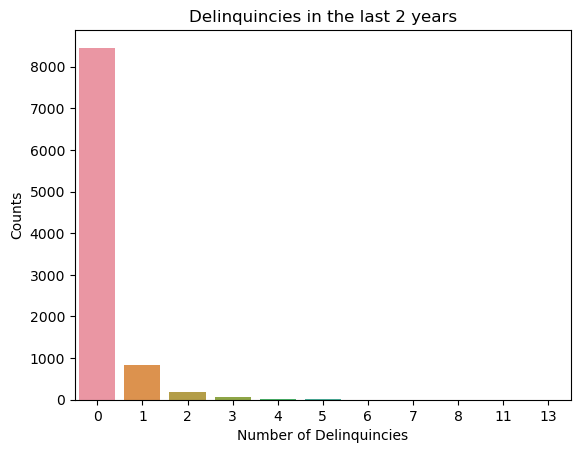

In [24]:
sns.countplot(x = df['delinq.2yrs'], data = df)
plt.title("Delinquincies in the last 2 years")
plt.xlabel("Number of Delinquincies")
plt.ylabel("Counts");

## 7. Public Records

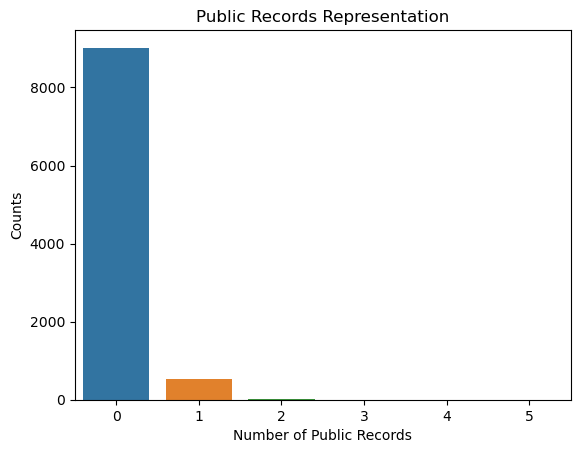

In [25]:
sns.countplot(x = df['pub.rec'], data = df)
plt.title("Public Records Representation")
plt.xlabel("Number of Public Records")
plt.ylabel("Counts");

In [26]:
df.head() 

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,FICO_GRADE,CREDIT UTIL,DTI RESULTS
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,Good,High,Moderate DTI
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,Good,High,Low DTI
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,Good,Fair,Low DTI
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,Good,High,Low DTI
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,Fair,Poor,Low DTI


## 8. FICO Grades VS DTI Results

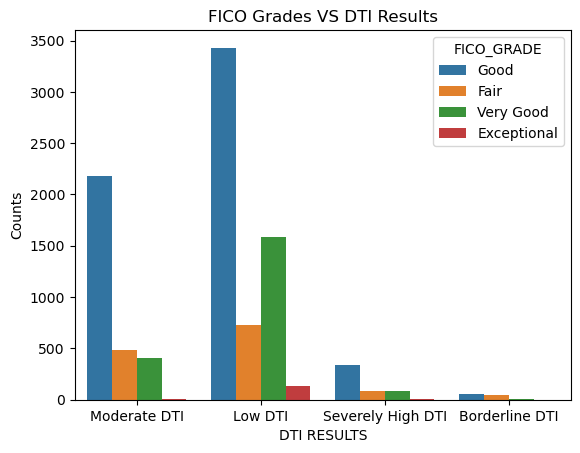

In [27]:
sns.countplot(x = df["DTI RESULTS"], hue = df["FICO_GRADE"], data = df )
plt.title("FICO Grades VS DTI Results")
plt.ylabel("Counts");

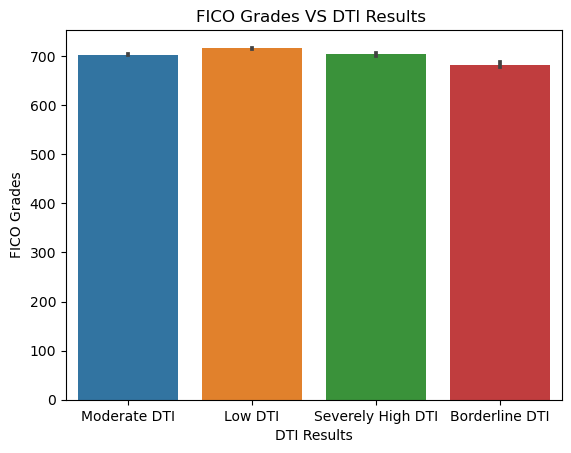

In [28]:
sns.barplot(x = df["DTI RESULTS"], y = df["fico"], data = df )
plt.title("FICO Grades VS DTI Results ")
plt.xlabel("DTI Results")
plt.ylabel("FICO Grades");

## 9. FICO Grades VS Credit Utilization 

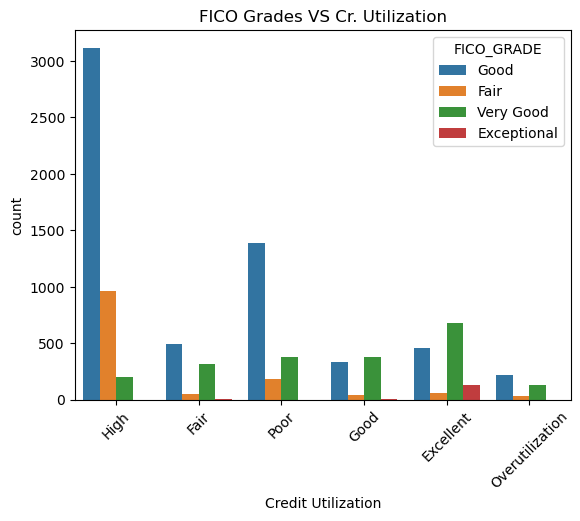

In [29]:
sns.countplot(x = df["CREDIT UTIL"],hue = df["FICO_GRADE"],data = df)
plt.title("FICO Grades VS Cr. Utilization")
plt.xticks(rotation = 45)
plt.xlabel("Credit Utilization");

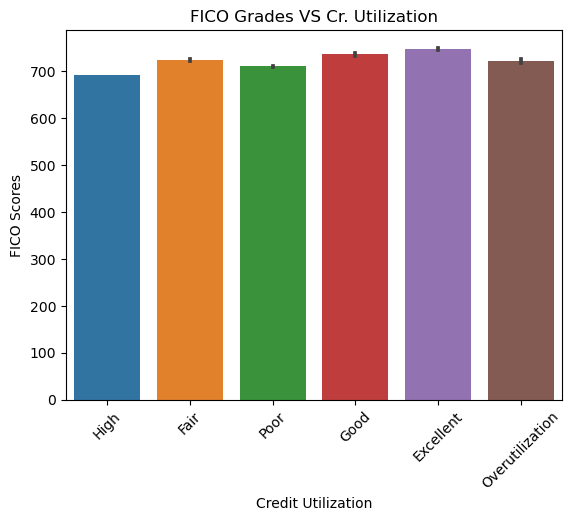

In [30]:
sns.barplot(x = df["CREDIT UTIL"], y = df["fico"],data = df)
plt.title("FICO Grades VS Cr. Utilization")
plt.xticks(rotation = 45)
plt.xlabel("Credit Utilization")
plt.ylabel("FICO Scores");

## 10. FICO Scores VS Deliquincies in last 2 years

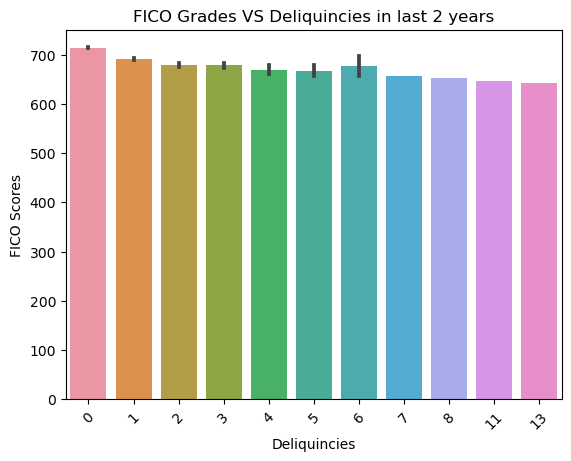

In [31]:
sns.barplot(x = df["delinq.2yrs"],y = df["fico"],data = df)
plt.title("FICO Grades VS Deliquincies in last 2 years")
plt.xticks(rotation = 45)
plt.xlabel("Deliquincies")
plt.ylabel("FICO Scores");

## 11. FICO Scores VS Credit Line Days

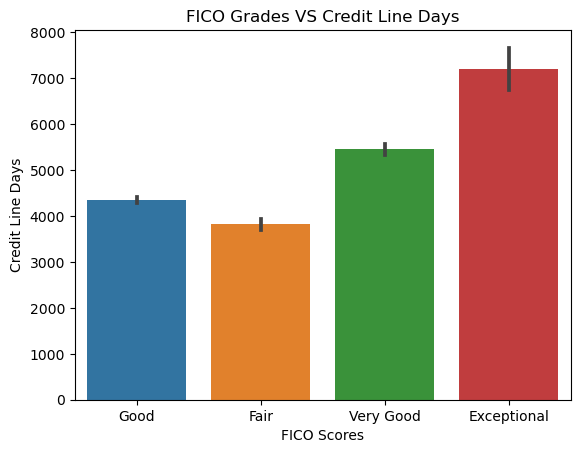

In [32]:
sns.barplot(x = df["FICO_GRADE"],y = df["days.with.cr.line"],data = df)
plt.title("FICO Grades VS Credit Line Days")
plt.xlabel("FICO Scores")
plt.ylabel("Credit Line Days");

## 12. FICO Scores VS Public Records

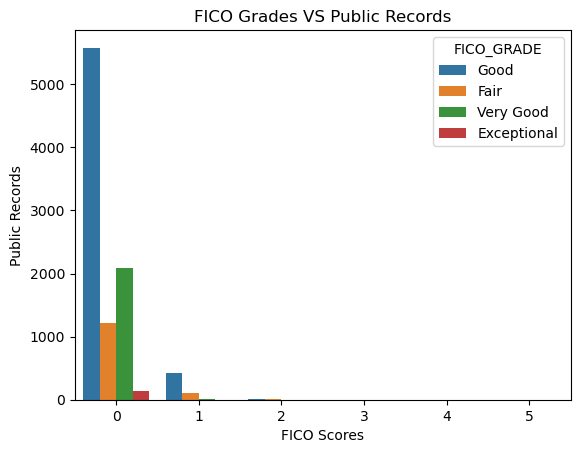

In [33]:
sns.countplot(x = df["pub.rec"],hue = df["FICO_GRADE"],data = df)
plt.title("FICO Grades VS Public Records")
plt.xlabel("FICO Scores")
plt.ylabel("Public Records");

## 13. What's the most in demand Purpose among those with an "Exceptional" & "Very Good" FICO Score?

In [34]:
# Creating a new data frame which comprises the FICO Scores and Purposes of those 
# who got an Exceptional and Very Good FICO Scores
epvg = []
pur = []
for i, z in enumerate(zip(df["FICO_GRADE"], df["purpose"])):
    if z[0] == "Exceptional" or z[0] == "Very Good":
        epvg.append(z[0])  
        pur.append(z[1])

In [35]:
# Creating a dicionary
new_df = {"High Scores":epvg, "Purposes":pur}

In [36]:
# Converting Dictionary to a df
df2 = pd.DataFrame(new_df)

In [37]:
# Adding a new column
df2["High Scores (Values)"] = df["fico"]

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   High Scores           2230 non-null   object
 1   Purposes              2230 non-null   object
 2   High Scores (Values)  2230 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 52.4+ KB


In [39]:
df2.head()

,High Scores,Purposes,High Scores (Values)
0,Very Good,debt_consolidation,737
1,Very Good,small_business,707
2,Very Good,credit_card,682
3,Very Good,all_other,712
4,Very Good,all_other,667


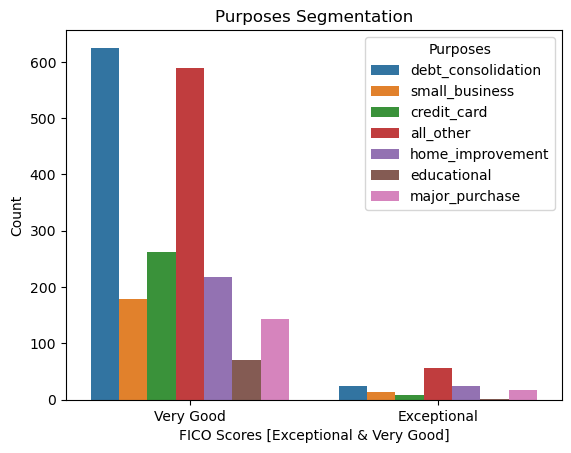

In [40]:
sns.countplot(x = df2["High Scores"], hue = df2["Purposes"],data = df2)
plt.title("Purposes Segmentation")
plt.xlabel("FICO Scores [Exceptional & Very Good]")
plt.ylabel("Count");

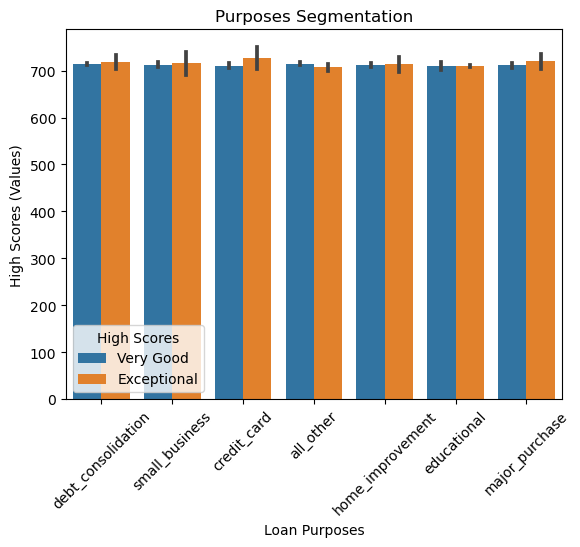

In [41]:
sns.barplot(x = df2["Purposes"], y = df2["High Scores (Values)"], hue =df2["High Scores"] ,data = df2)
plt.title("Purposes Segmentation")
plt.xlabel("Loan Purposes")
plt.xticks(rotation = 45);

# Conclusion

##### 1. Majority of the loan puproses is Debt Consolidation.
##### 2. Most Loan Requesters have Good FICO Scores(62.7%).
##### 3. More than 4000 Loan Requesters have High Credit Utilization Status. (Bad Influence)
##### 4. More than 5000 Loan Requesters have Low DTI. (Great Influence)
##### 5. Most of the loan requesters haven't paid their debts fully.
##### 6. The vast majority of the clients have 0 Deliquincies in the last 2 years. (Great Influence) 
##### 7. The majority of the clients have 0 Public Records in the last 2 years. (Great Influence) 
##### 8. There is an inverse relation between DTI & FICO Scores as the lower DTI, the higher the FICO Score. (Makes sense)
##### 9. The majority of the people within the Low DTI Domain tend to have Good FICO Scores. (Makes sense)
##### 10. The highest people with the lowest DTI have the Great FICO Scores. (Makes sense)
##### 11. Those who have Excellent Credit Utilization Scores, have the highest FICO Scores. (Makes sense)
##### 12. Those with the least number of deliquinceies, have the highest FICO Scores. (Makes sense)
##### 13. Those with the highest number of days within credit line, have the Exceptional FICO Scores. (Makes sense)
##### 14. Those with the least number of public records, have the the highst FICO Scores. (Makes sense)
##### 15. Those with Exceptional & Very Good FICO Scores have the debt consolidation as their primary purpose for the loan.

In [44]:
df.to_csv("loan1", index = False )

In [43]:
df2.to_csv("loan2", index = False )

# Author:
   ## Mohamed Tamer Mohamed Abdelnabi